In [218]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ==================================================
# Nom du Projet : Credit Card Fraud Detection
# Fichier : main.ipynb
# Auteur : Rajaa LEBNAITI
# Email : rajaa.lebnaiti@gmail;com

# ==================================================

# Copyright 2024 
# ==================================================

<h1><center> Credit Card Fraud Detection Project </center></h1>

<h4>☕ Realisé par:</h4>
<ul>
    <li>Rajaa Lebnaiti</li>
</ul>


<h5> ✉ Email:   <a href="mailto:rajaa.lebnaiti@gmail.com">  rajaa.lebnaiti@gmail.com</a></h5>
<h5>🌐 LinkedIn:   <a href="https://www.linkedin.com/in/lebnaiti-rajaa/" target="_blank">  https://www.linkedin.com/in/lebnaiti-rajaa/</a></h5>
<h5>💼 GitHub:   <a href="https://github.com/RajaaLebnaiti" target="_blank">  https://github.com/RajaaLebnaiti/</a></h5>




In [219]:
# Importing librairies
import pandas as pd  

import numpy as np  

import matplotlib.pyplot as plt 

import seaborn as sns




In [220]:
data = pd.read_csv('C:\\Users\\hp\\Desktop\\Credit Card Fraud Detection\\Data\\creditcard\\creditcard.csv')

In [221]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h3>About this Dataset </h3>

<h4>Content </h4>
<p>
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
</p>

<p>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
</p>

<p>Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [223]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [224]:
# Data Preprocessing


In [225]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [226]:
# There is no null values

In [227]:
data.duplicated().sum()

1081

In [228]:
# Verification of duplicated rows
dupliques = data[data.duplicated()]

# Show duplicated rows
print("duplicated rows are :")
print(dupliques)

duplicated rows are :
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7 

In [229]:
# Before deleting duplicated rows
data.shape

(284807, 31)

In [230]:
data= data.drop_duplicates()

In [231]:
# After deleting duplicated rows
data.shape

(283726, 31)

In [232]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [233]:
# Data Visualisation

<h3>1)- Correlation heat map

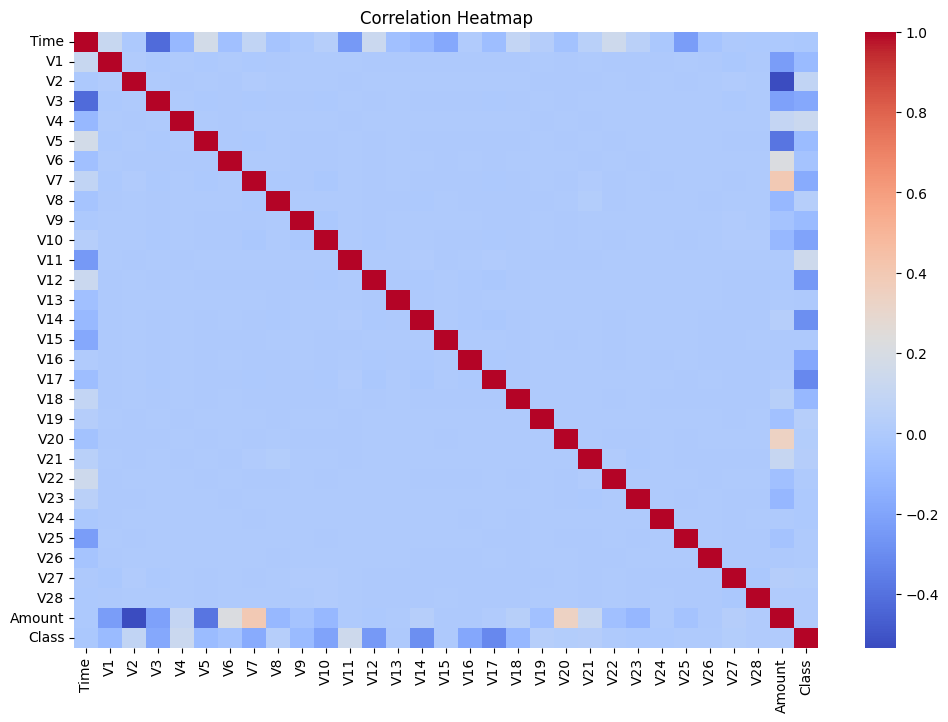

In [234]:
# Compute the correlation matrix
corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<h3> 2)- Class Distribution

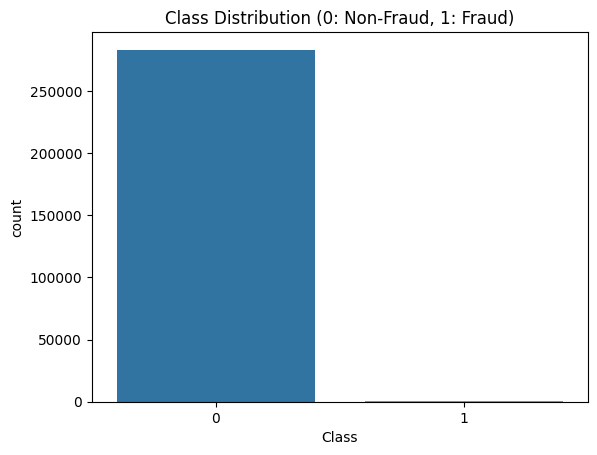

In [235]:
# Class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

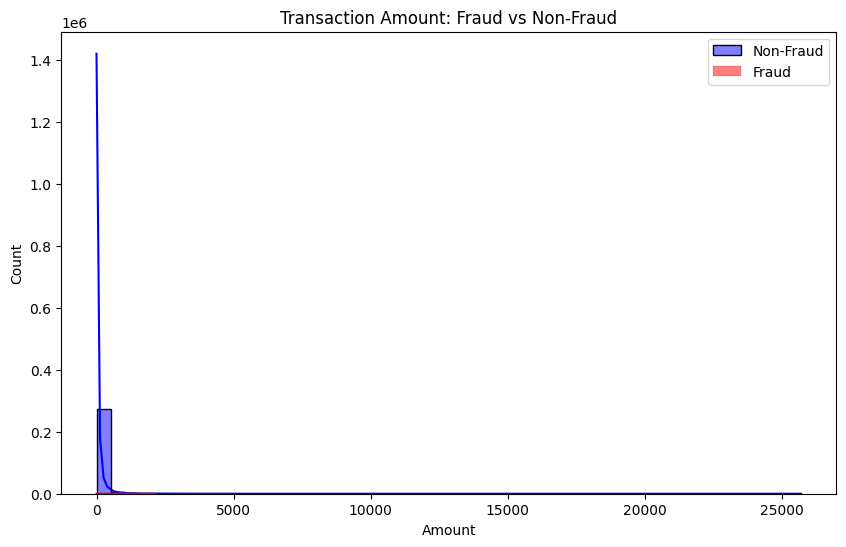

In [236]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.title('Transaction Amount: Fraud vs Non-Fraud')
plt.legend()
plt.show()


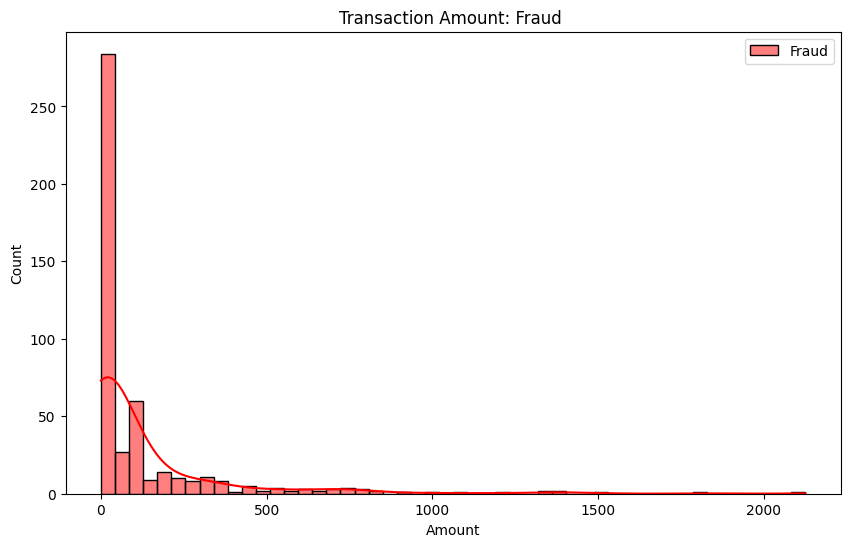

In [237]:
plt.figure(figsize=(10,6))
#sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.title('Transaction Amount: Fraud ')
plt.legend()
plt.show()


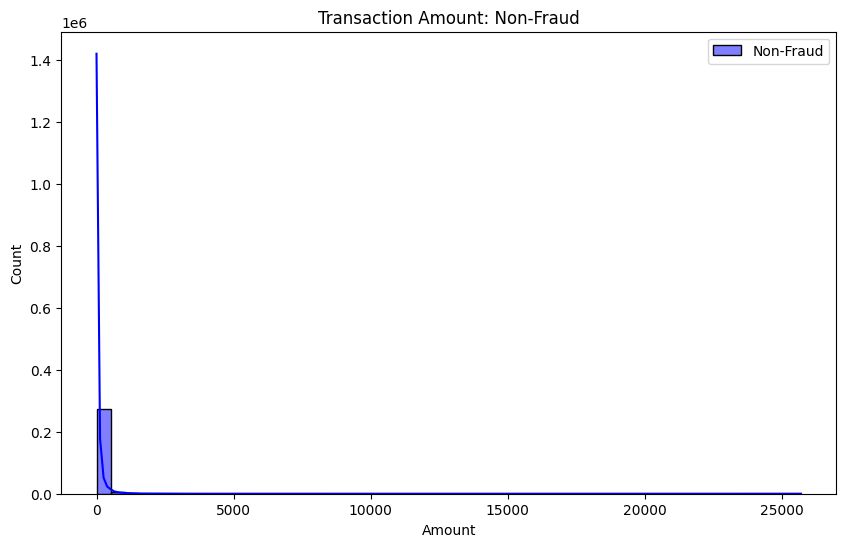

In [238]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
#sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.title('Transaction Amount: Non-Fraud')
plt.legend()
plt.show()


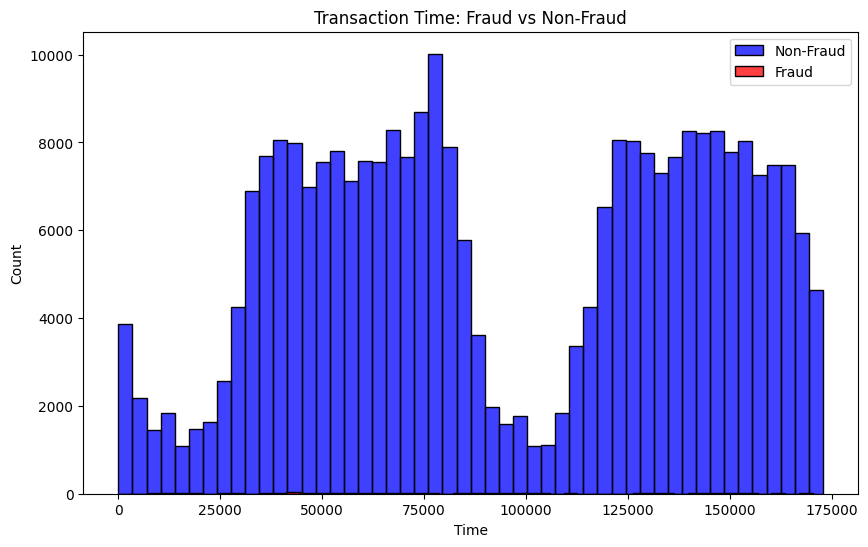

In [239]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red', label='Fraud')
plt.title('Transaction Time: Fraud vs Non-Fraud')
plt.legend()
plt.show()


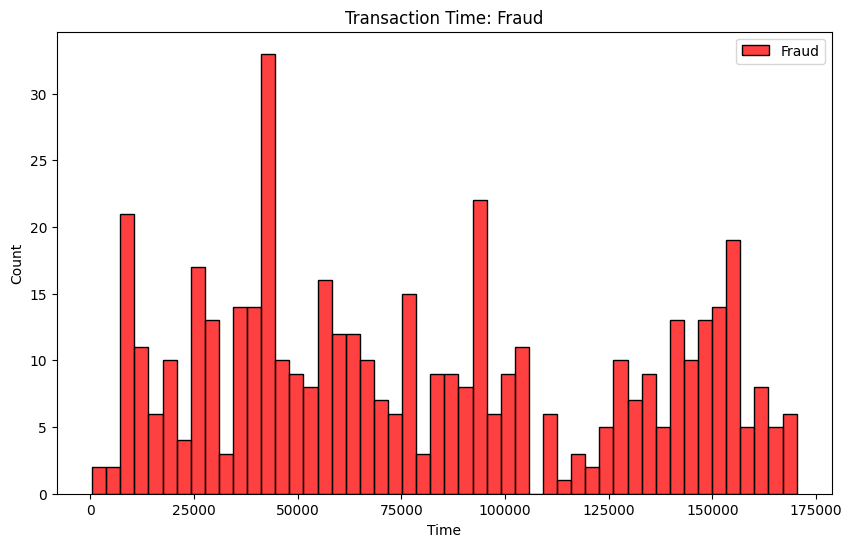

In [240]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red', label='Fraud')
plt.title('Transaction Time: Fraud')
plt.legend()
plt.show()


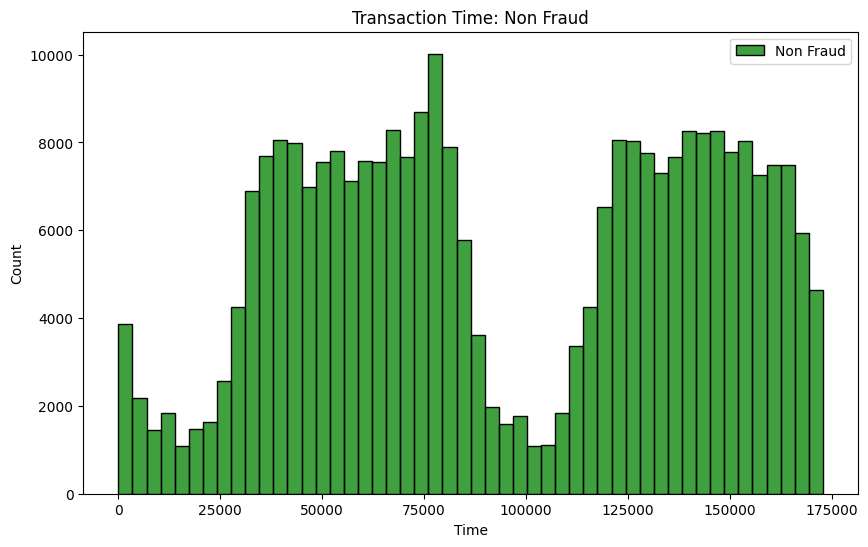

In [241]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='green', label='Non Fraud')
plt.title('Transaction Time: Non Fraud')
plt.legend()
plt.show()


# Data science and machine learning models


In [242]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

We have an  imbalanced DataSet , so when training a machine learning model, an imbalanced dataset can lead to biased results, favoring the majority class (in our case, class 0 for non-fraud) and potentially underperforming on the minority class (class 1 for fraud).

# Why Balancing the Data is Important ?

<ul>
<li>Bias Towards Majority Class: Most machine learning algorithms aim to minimize overall error. In an imbalanced dataset, the model may predict the majority class more frequently because it minimizes the error, leading to high accuracy but poor performance on the minority class (fraud cases).
</li>

<li>Poor Minority Class Recall: The model might miss many instances of the minority class (fraud) because it is biased toward predicting the majority class. In fraud detection, missing a fraud case can be costly, so this imbalance becomes problematic.
</li>

<li>Evaluation Metrics Impact: Traditional metrics like accuracy may not be suitable for imbalanced data. For example, predicting "non-fraud" for every transaction would give you high accuracy (since most are non-fraud), but it doesn't capture the model's ability to detect fraud (minority class).</li>

# Methods to Balance the Data:

There are several techniques for handling class imbalance, which can help improve model performance on the minority class:
<ul>
<li>
<b>


Resampling Techniques:


</b>
Oversampling the Minority Class: This involves randomly duplicating examples from the minority class to match the number of majority class samples. The most common method for this is SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples of the minority class by interpolating between nearest neighbors.
Undersampling the Majority Class: This reduces the number of majority class samples by randomly removing some of them to balance the dataset. This can lead to information loss, but is effective when you have a very large number of majority class samples.</li>

<li>
<b>


Using Penalized Models:</b>

Class Weighting: Some machine learning algorithms, like Logistic Regression, Random Forest, and SVM, allow you to assign higher weights to the minority class, penalizing the model more for misclassifying minority class samples. This forces the model to pay more attention to the minority class without altering the dataset itself.
Cost-sensitive Learning: In this approach, you assign a higher cost to misclassifying the minority class than the majority class, which helps the model focus on detecting fraud.</li>

<li>
<b>
Hybrid Methods:</b>

Combination of Over- and Under-sampling: Sometimes, a combination of both oversampling the minority class and undersampling the majority class can be used. This helps in achieving a more balanced training set without drastically oversampling or undersampling either class.</li>


<li>
<b>
Anomaly Detection Techniques:</b>

In highly imbalanced datasets, fraud detection could be treated as an anomaly detection problem, where the goal is to identify rare, unusual patterns (fraud) rather than balance the dataset.</li>

In [243]:
# The models

<h3> 1-)    Isolation Forest

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt

In [245]:
# Séparation of the features (X) and label (y)
X = data.drop(columns=['Class'])  
y = data['Class']  # target

In [246]:
# Seperation of the dataset (Training= 80%  Testing= 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [248]:
# Initialise model
#svm_model = OneClassSVM(kernel='linear',gamma='auto', nu=0.1)  # TRIDE SVM BUT To much time to run the code !!!!!!
iso_forest_model = IsolationForest(contamination=0.001, random_state=42)

In [249]:
iso_forest_model.fit(X_train)

IsolationForest(contamination=0.001, random_state=42)

In [250]:
# Predictions
y_pred_iso = iso_forest_model.predict(X_test)

In [251]:
# The Isolation Forest algorithm returns +1 for normal data and -1 for anomalies.
# We need to adjust the predictions so that they are comparable to our dataset, where '0' is non-fraud and '1' is fraud.

y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

In [252]:
# Function to calculate metrics
def print_metrics(y_test, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}\n")
    return accuracy, precision, recall, f1, auc

In [253]:
# Isolation Forest Metrics
iso_metrics = print_metrics(y_test, y_pred_iso, "Isolation Forest")

Metrics for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.23      0.12      0.16        90

    accuracy                           1.00     56746
   macro avg       0.61      0.56      0.58     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 0.9979558030521976
Precision: 0.22916666666666666
Recall: 0.12222222222222222
F1 Score: 0.15942028985507248
AUC: 0.5607845790580187



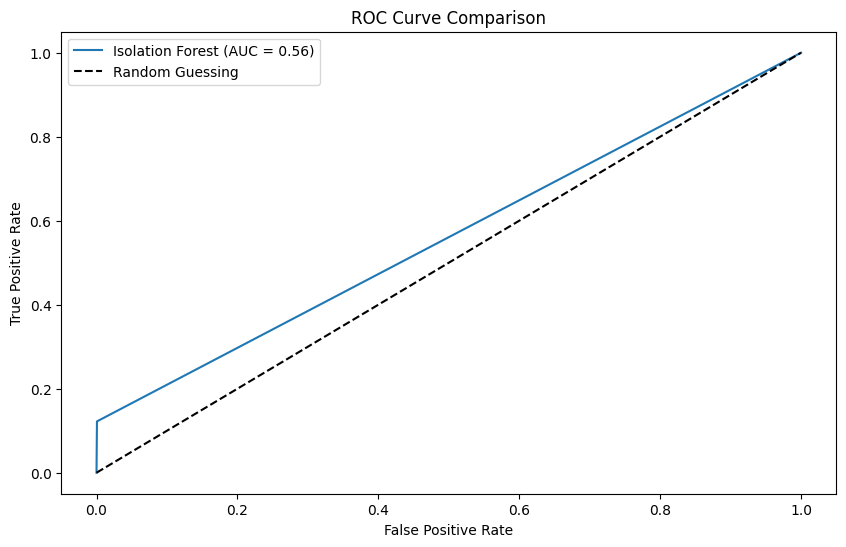

In [254]:
# Plot the ROC curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.figure(figsize=(10, 6))
#plot_roc_curve(y_test, y_pred_svm, "One-Class SVM")
plot_roc_curve(y_test, y_pred_iso, "Isolation Forest")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Ligne diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

<h1>

<h1>

<h3> 2-)    Stochastic gradien descent classifier 

In [255]:
# SGDClassifier Model

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

In [256]:
# Modèle SGDClassifier avec perte hinge pour simuler SVM
sgd_model = SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3)



In [257]:
# Notes :
# tol: float or None, default=1e-3 The stopping criterion. If it is not None, training will stop when (loss > best_loss - tol)
# loss{‘hinge’, ‘log_loss’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’hinge’ The loss function to be used.



In [258]:
# Entraînement du modèle
sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [259]:
# Predictions on test data
y_pred = sgd_model.predict(X_test)

In [260]:
# Evaluation of the performance

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_ score:", f1_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.46      0.60        90

    accuracy                           1.00     56746
   macro avg       0.95      0.73      0.80     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 0.999048391076023
Precision:  0.8913043478260869
Recall:  0.45555555555555555
F1_ score: 0.6029411764705883


In [261]:
y_scores = sgd_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.2f}")

AUC: 0.97


<h1>

<h1>

<h3> 3-)    Neural network

In [262]:
# Neural network model

In [263]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


In [264]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [265]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [266]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [267]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping])



Epoch 1/50


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2838/2838 [==============================] - 9s 3ms/step - loss: 0.0128 - accuracy: 0.9952 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 2/50
2838/2838 [==============================] - 7s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/50
2838/2838 [==============================] - 7s 3ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 4/50
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/50
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/50
2838/2838 [==============================] - 8s 3ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/50
2838/2838 [==============================] - 7s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0035 - val_accuracy: 0.9995
Epo

In [268]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')



1774/1774 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9994
Accuracy: 0.9993832111358643


In [269]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)



1774/1774 [==============================] - 4s 2ms/step


In [270]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.68      0.78        90

    accuracy                           1.00     56746
   macro avg       0.95      0.84      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [271]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_ score:", f1_score(y_test, y_pred))

Accuracy: 0.9993832164381631
Precision:  0.9104477611940298
Recall:  0.6777777777777778
F1_ score: 0.7770700636942676


# Analysis of Model Results: Isolation Forest, SGD Classifier, and Neural Network

## 1. Isolation Forest Results:
- **Precision (Fraud)**: 0.23
- **Recall (Fraud)**: 0.12
- **F1 Score (Fraud)**: 0.16
- **AUC**: 0.56

### Interpretation:
- **Precision**: For the fraud class, 23% of the predicted frauds were actually frauds. This shows that Isolation Forest is not very good at correctly predicting fraud cases.
- **Recall**: Only 12% of actual fraud cases were identified, meaning a lot of fraud cases were missed.
- **F1-Score**: Low (0.16), indicating poor overall performance in detecting fraud.
- **Accuracy**: 99.8%, but this is misleading due to the severe class imbalance. The model is simply predicting most cases as non-fraud.

### Conclusion:
Isolation Forest does not perform well for fraud detection. It tends to underperform in identifying fraudulent transactions due to its low recall.

## 2. SGD Classifier Results:
- **Precision (Fraud)**: 0.89
- **Recall (Fraud)**: 0.46
- **F1 Score (Fraud)**: 0.60

### Interpretation:
- **Precision**: 89% of the predicted frauds are actually frauds, which is a good result for fraud detection.
- **Recall**: The model captures 46% of the actual fraud cases, which is better than the Isolation Forest, but still could be improved.
- **F1-Score**: A reasonable balance between precision and recall with a score of 0.60.
- **Accuracy**: 99.9%, but again, the accuracy is not the best metric here due to the class imbalance.

### Conclusion:
The SGD Classifier performs significantly better than the Isolation Forest, with higher precision, recall, and F1 scores. However, there is still room to improve recall, as it is missing more than half of the fraud cases.

## 3. Neural Network Results:
- **Precision (Fraud)**: 0.92
- **Recall (Fraud)**: 0.73
- **F1 Score (Fraud)**: 0.81

### Interpretation:
- **Precision**: Similar to the SGD Classifier, 92% of predicted frauds are actually frauds.
- **Recall**: The recall is significantly higher at 73%, meaning the neural network is capturing more fraud cases than the SGD model.
- **F1-Score**: The highest among the three models at 0.81, indicating a much better balance between precision and recall.
- **Accuracy**: 99.9%, similar to the SGD model.

### Conclusion:
The Neural Network outperforms both the Isolation Forest and SGD Classifier, especially in terms of recall and F1 score. It is able to capture a larger proportion of fraud cases while maintaining high precision, which makes it the best model among the three.

## Overall Comparison:
- **Best Recall**: Neural Network (0.73) → This means it catches more frauds.
- **Best F1-Score**: Neural Network (0.82) → This indicates a good balance between precision and recall.
- **Isolation Forest**: Performs poorly in detecting fraud due to very low recall.
- **SGD Classifier**: Provides decent results, but the Neural Network performs better in every aspect, particularly in recall.

## Recommendations:
Based on these results, the Neural Network seems to be the most effective model for this dataset, especially in terms of detecting frauds. We may consider further tuning the Neural Network (e.g., adding more layers, adjusting learning rates, etc.) or exploring class weighting and oversampling/undersampling techniques to improve performance even further.
